<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/MNIST_Digits_Classification_CNN/blob/main/MNIST_Digits_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [3]:
# Loading and preprocessing the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [4]:
# Build the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [12]:
# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 0.0374 - val_accuracy: 0.9931
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.0424 - val_accuracy: 0.9922
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9958 - val_loss: 0.0447 - val_accuracy: 0.9911
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.0374 - val_accuracy: 0.9920
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0438 - val_accuracy: 0.9924
Epoch 6/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0467 - val_accuracy: 0.9920
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0139 - accuracy: 0.9964 - val_loss: 0.0421 - val_accuracy: 0.9933
Epoch 

In [13]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0379 - accuracy: 0.9941
Test accuracy: 0.9940999746322632


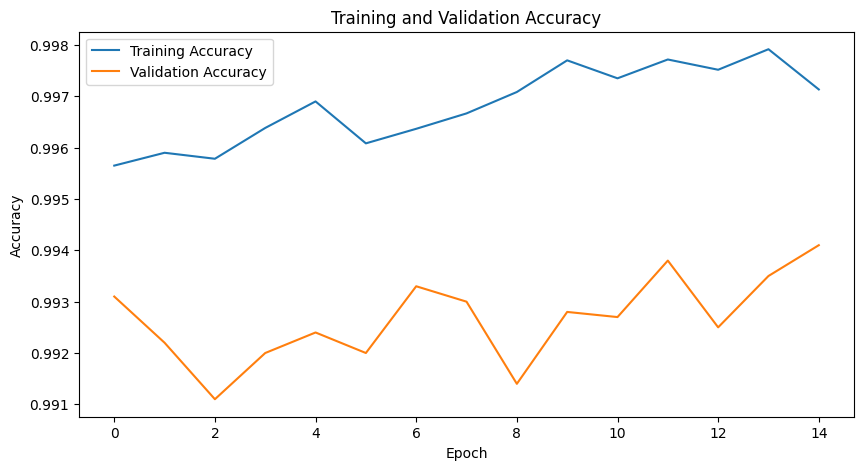

In [15]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

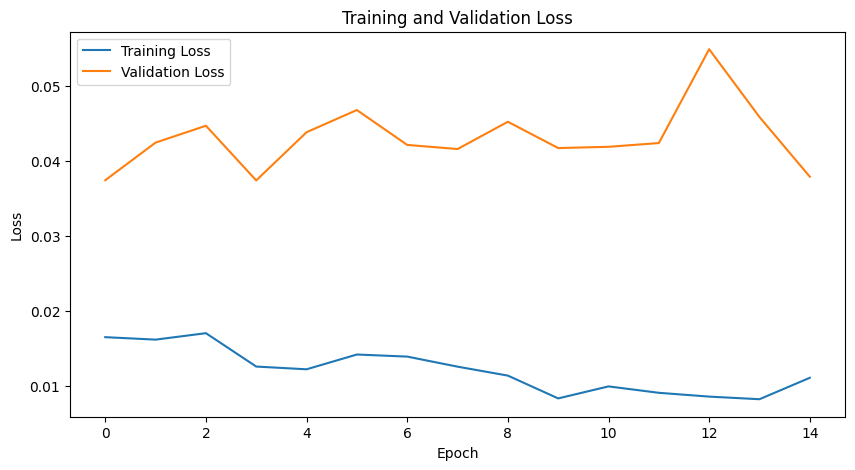

In [17]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 308ms/step


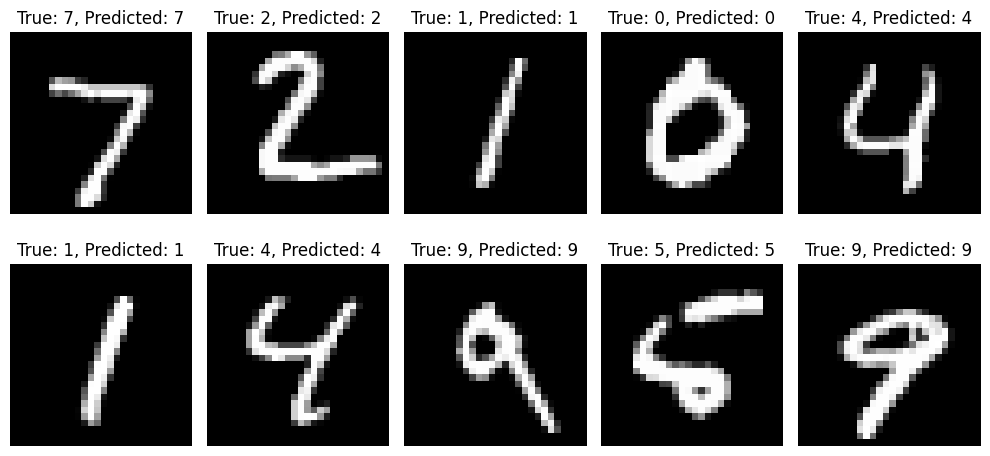

In [18]:
# Visualizing some sample predictions
num_samples = 10
sample_images = test_images[:num_samples]
sample_labels = test_labels[:num_samples]
predictions = model.predict(sample_images)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {tf.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()